# Proyecto Venta de Videojuegos
## Topicos Avanzados de Ciencias de la Computacion

Este proyecto pretende demostrar un control básico sobre un DataFrame utilizando pandas. También se quiere mostrar un manejo sencillo sobre librerías como WordCloud y PyPlot.

Para iniciar, Importamos todo lo necesario para hacer que esto funcione...

In [150]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

### Estableciendo y manipulando un DataFrame

Con lo siguiente lograremos, utilizando pandas, recopilar la información contenida dentro de nuestro .csv, para crear así un DataFrame.

In [151]:
df = pd.read_csv('datasets/vgsales.csv')

Ahora nos desharemos de todos los renglones que no contengan datos.

In [152]:
df = df.dropna()

y mostraremos el contenido de nuestro DataFrame... pero solamente los primeros 10 renglones.

In [153]:
df.head(10)
#Y son muchos

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Ya que está nuestro DataFrame cargado, podemos seleccionar una columna a nuestra preferencia y declarar los datos únicos contenidos en la misma, en este caso "publisher".

In [154]:
publishers = df["Publisher"].unique()

In [155]:
#publishers #<--- Son muchos :(

Ahora declaramos las columnas más relevantes de nuestro DataFrame.

In [156]:
df_overall = df[['Name','Year', 'Publisher', 'Platform',  'Global_Sales']]

Y si queremos el dato más repetido (moda) en una columna?

In [157]:
df_overall["Platform"].mode()

0    DS
dtype: object

Qué tal si queremos la información, correspondiente a uno de esos datos únicos dentro de la columna, de dentro de nuestro DataFrame?... Por ahora solo mostremos 10.

In [158]:
booleans = df_overall['Publisher'] == 'Electronic Arts' #<--- Incruste aqui uno de los datos
df_publisher = df_overall[booleans]
df_publisher.head(10)
#son muuuuchos más...

,Name,Year,Publisher,Platform,Global_Sales
77,FIFA 16,2015.0,Electronic Arts,PS4,8.49
82,FIFA Soccer 13,2012.0,Electronic Arts,PS3,8.24
83,The Sims 3,2009.0,Electronic Arts,PC,8.11
92,Star Wars Battlefront (2015),2015.0,Electronic Arts,PS4,7.67
99,Battlefield 3,2011.0,Electronic Arts,X360,7.34
103,Battlefield 3,2011.0,Electronic Arts,PS3,7.23
104,Need for Speed Underground,2003.0,Electronic Arts,PS2,7.20
112,FIFA 14,2013.0,Electronic Arts,PS3,6.90
113,Need for Speed Underground 2,2004.0,Electronic Arts,PS2,6.90
114,Medal of Honor: Frontline,2002.0,Electronic Arts,PS2,6.83


Con lo siguiente podremos observar el promedio numérico (Global_Sales) para uno y cada uno de nuestros datos únicos (Publisher), anteriormente obtenidos.

In [159]:
def calculate_global_sale_average(publisher):
    booleans = df_overall['Publisher'] == publisher
    df_publisher = df_overall[booleans]
    print('Venta global promedio de un juego de <<', publisher, '>> es:', df_publisher['Global_Sales'].sum() / len(df_publisher))

In [160]:
calculate_global_sale_average('Nintendo')

Venta global promedio de un juego de << Nintendo >> es: 2.563836206896552


In [161]:
for publisher in publishers:
    calculate_global_sale_average(publisher)
#-------Aquí hay muuuuchos datos amigo :(

Venta global promedio de un juego de << Nintendo >> es: 2.563836206896552
Venta global promedio de un juego de << Microsoft Game Studios >> es: 1.3004761904761906
Venta global promedio de un juego de << Take-Two Interactive >> es: 0.9691747572815534
Venta global promedio de un juego de << Sony Computer Entertainment >> es: 0.8904398826979474
Venta global promedio de un juego de << Activision >> es: 0.7468012422360248
Venta global promedio de un juego de << Ubisoft >> es: 0.515838779956427
Venta global promedio de un juego de << Bethesda Softworks >> es: 1.1815942028985504
Venta global promedio de un juego de << Electronic Arts >> es: 0.8165720687079911
Venta global promedio de un juego de << Sega >> es: 0.4283227848101266
Venta global promedio de un juego de << SquareSoft >> es: 1.1086538461538462
Venta global promedio de un juego de << Atari >> es: 0.4229682997118155
Venta global promedio de un juego de << 505 Games >> es: 0.29119791666666667
Venta global promedio de un juego de << Ca

Venta global promedio de un juego de << Pinnacle >> es: 0.28400000000000003
Venta global promedio de un juego de << CTO SpA >> es: 0.45
Venta global promedio de un juego de << TalonSoft >> es: 0.87
Venta global promedio de un juego de << Crystal Dynamics >> es: 0.34199999999999997
Venta global promedio de un juego de << SCi >> es: 0.20705882352941177
Venta global promedio de un juego de << Quelle >> es: 0.87
Venta global promedio de un juego de << mixi, Inc >> es: 0.86
Venta global promedio de un juego de << Rage Software >> es: 0.2028571428571429
Venta global promedio de un juego de << Ubisoft Annecy >> es: 0.31857142857142856
Venta global promedio de un juego de << Scholastic Inc. >> es: 0.2909999999999999
Venta global promedio de un juego de << Interplay >> es: 0.22199999999999998
Venta global promedio de un juego de << Mystique >> es: 0.82
Venta global promedio de un juego de << ChunSoft >> es: 0.22611111111111107
Venta global promedio de un juego de << Square EA >> es: 0.8
Venta g

Venta global promedio de un juego de << Marvelous Interactive >> es: 0.07446428571428573
Venta global promedio de un juego de << Kalypso Media >> es: 0.07500000000000001
Venta global promedio de un juego de << Nihon Falcom Corporation >> es: 0.11
Venta global promedio de un juego de << Wargaming.net >> es: 0.29
Venta global promedio de un juego de << Angel Studios >> es: 0.14666666666666664
Venta global promedio de un juego de << Arc System Works >> es: 0.05692307692307692
Venta global promedio de un juego de << Playmates >> es: 0.28
Venta global promedio de un juego de << SNK Playmore >> es: 0.05333333333333333
Venta global promedio de un juego de << Hamster Corporation >> es: 0.15000000000000002
Venta global promedio de un juego de << From Software >> es: 0.10866666666666669
Venta global promedio de un juego de << Nippon Columbia >> es: 0.13571428571428573
Venta global promedio de un juego de << Nichibutsu >> es: 0.28
Venta global promedio de un juego de << Little Orbit >> es: 0.0784

Venta global promedio de un juego de << Telstar >> es: 0.09000000000000001
Venta global promedio de un juego de << U.S. Gold >> es: 0.0825
Venta global promedio de un juego de << DreamWorks Interactive >> es: 0.13
Venta global promedio de un juego de << Data Design Interactive >> es: 0.09666666666666668
Venta global promedio de un juego de << MTO >> es: 0.049999999999999996
Venta global promedio de un juego de << DHM Interactive >> es: 0.06
Venta global promedio de un juego de << FunSoft >> es: 0.12
Venta global promedio de un juego de << SPS >> es: 0.12
Venta global promedio de un juego de << Bohemia Interactive >> es: 0.12
Venta global promedio de un juego de << Reef Entertainment >> es: 0.048571428571428585
Venta global promedio de un juego de << Tru Blu Entertainment >> es: 0.035
Venta global promedio de un juego de << Moss >> es: 0.065
Venta global promedio de un juego de << T&E Soft >> es: 0.12
Venta global promedio de un juego de << O-Games >> es: 0.06352941176470588
Venta globa

Venta global promedio de un juego de << MediaQuest >> es: 0.05
Venta global promedio de un juego de << Max Five >> es: 0.05
Venta global promedio de un juego de << Comfort >> es: 0.025000000000000005
Venta global promedio de un juego de << Monte Christo Multimedia >> es: 0.05
Venta global promedio de un juego de << Pony Canyon >> es: 0.05
Venta global promedio de un juego de << Riverhillsoft >> es: 0.04
Venta global promedio de un juego de << Summitsoft >> es: 0.04
Venta global promedio de un juego de << Milestone S.r.l >> es: 0.025
Venta global promedio de un juego de << Playmore >> es: 0.04
Venta global promedio de un juego de << MLB.com >> es: 0.04
Venta global promedio de un juego de << Kool Kizz >> es: 0.04
Venta global promedio de un juego de << Flashpoint Games >> es: 0.04
Venta global promedio de un juego de << 49Games >> es: 0.04
Venta global promedio de un juego de << Legacy Interactive >> es: 0.04
Venta global promedio de un juego de << Alawar Entertainment >> es: 0.025
Vent

Venta global promedio de un juego de << Ascaron Entertainment >> es: 0.01
Venta global promedio de un juego de << Piacci >> es: 0.01
Venta global promedio de un juego de << Nitroplus >> es: 0.01
Venta global promedio de un juego de << Paradox Development >> es: 0.01
Venta global promedio de un juego de << Otomate >> es: 0.01
Venta global promedio de un juego de << Ongakukan >> es: 0.01
Venta global promedio de un juego de << Commseed >> es: 0.01
Venta global promedio de un juego de << Inti Creates >> es: 0.01
Venta global promedio de un juego de << Takuyo >> es: 0.01
Venta global promedio de un juego de << Interchannel-Holon >> es: 0.01
Venta global promedio de un juego de << Rain Games >> es: 0.01
Venta global promedio de un juego de << UIG Entertainment >> es: 0.01



Generemos un array con los renglones que contengan un dato (string) en específico dentro de una columna (columna Name) también en especifica. Y después a mostrarlo...

In [162]:
df_overall.reset_index(inplace=True)  #Esta linea puede dar problemas
i = 0
ll =[]
for name in df_overall["Name"][0:len(df_overall["Name"])]:
    if( "Mario" in name): #<--- Incruste nombre a buscar
        l = []
        for x in df_overall.loc[i]:
            l.append(x)
        ll.append(l)
    i += 1

In [163]:
ll  #<--- Son demaciados :(

[[1, 'Super Mario Bros.', 1985.0, 'Nintendo', 'NES', 40.24],
 [2, 'Mario Kart Wii', 2008.0, 'Nintendo', 'Wii', 35.82],
 [6, 'New Super Mario Bros.', 2006.0, 'Nintendo', 'DS', 30.01],
 [8, 'New Super Mario Bros. Wii', 2009.0, 'Nintendo', 'Wii', 28.62],
 [11, 'Mario Kart DS', 2005.0, 'Nintendo', 'DS', 23.42],
 [18, 'Super Mario World', 1990.0, 'Nintendo', 'SNES', 20.61],
 [21, 'Super Mario Land', 1989.0, 'Nintendo', 'GB', 18.14],
 [22, 'Super Mario Bros. 3', 1988.0, 'Nintendo', 'NES', 17.28],
 [42, 'Mario Kart 7', 2011.0, 'Nintendo', '3DS', 12.21],
 [46, 'Super Mario 64', 1996.0, 'Nintendo', 'N64', 11.89],
 [48, 'Super Mario Galaxy', 2007.0, 'Nintendo', 'Wii', 11.52],
 [50, 'Super Mario Land 2: 6 Golden Coins', 1992.0, 'Nintendo', 'GB', 11.18],
 [53, 'Super Mario 3D Land', 2011.0, 'Nintendo', '3DS', 10.79],
 [57, 'Super Mario All-Stars', 1993.0, 'Nintendo', 'SNES', 10.55],
 [59, 'Super Mario 64', 2004.0, 'Nintendo', 'DS', 10.42],
 [63, 'Mario Kart 64', 1996.0, 'Nintendo', 'N64', 9.87],
 

Ya que sabemos como movernos un poco con un DataFrame empecemos con WordCloud...

### Manejo para WordCloud

Una manera sencilla para empezar a crear un WordCloud es estableciendo un texto con todas las palabras que quieras utilizar... claro! de manera automática.
En mi caso utilizare la columna "Publisher" para saber cual es el editor que más aparece en mi DataFrame.


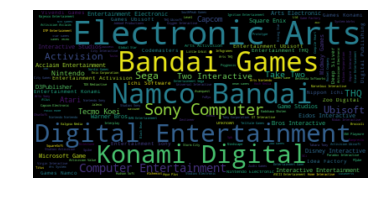

In [164]:
#---Creamos el texto---
stringPublishers = ""
for name in df_overall["Publisher"][0:len(df_overall["Publisher"])]:
    stringPublishers += name + " "
#----------------------
#---Generamos el WordCloud---
wordcloud = WordCloud().generate(stringPublishers)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Y para saber que estamos en lo correcto, utilizamos la moda.

In [165]:
df_overall["Publisher"].mode()

0    Electronic Arts
dtype: object

Ahora, con un ejemplo un poco más complejo, declaramos un diccionario al cual le agregaremos cada uno de nuestros publishers únicos y su promedio por venta global.

In [166]:
#Función que recibe un publisher y un diccionario para asignar el promedio de venta global
def save_global_sale_average(publisher, dicc):
    booleans = df_overall['Publisher'] == publisher
    df_publisher = df_overall[booleans]
    dicc[publisher] = df_publisher['Global_Sales'].sum() / len(df_publisher)

In [167]:
#Declarando diccionario y agregando tanto los publishers como los promedios de venta global correspondientes
dicc = {}
for publisher in publishers:
     save_global_sale_average(publisher,dicc)

Y generamos un WordCloud que nos dirá cual es el Publisher con mayor promedio de ventas global.

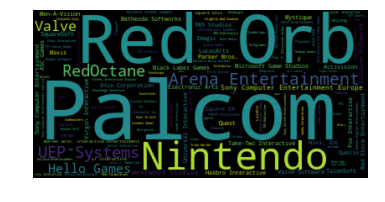

In [168]:
wordcloud = WordCloud().generate_from_frequencies(dicc)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Un pequeño ejemplo para PyPlot

Agrupamos a todos nuestros publishers y generamos una gráfica que indica cuántas veces aparece repetido un publisher en la columna con respecto a él mismo... en otras palabras es una gráfica que indica cuantos juegos existen en el DataFrame con ese respectivo publisher.

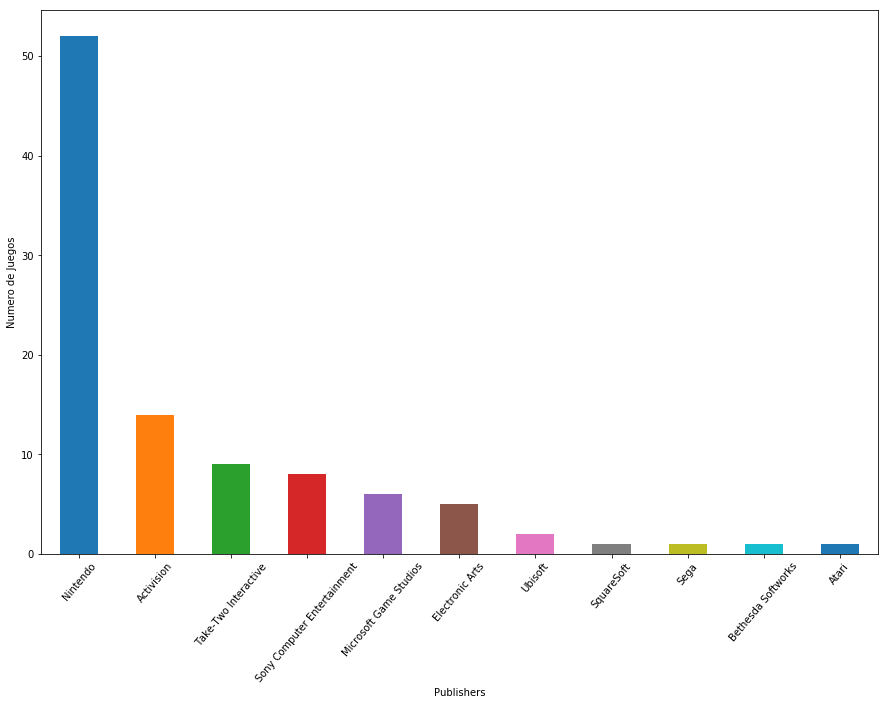

In [169]:
#pub = df.groupby("Publisher")
pub = df.head(100).groupby("Publisher")
plt.figure(figsize=(15,10))
pub.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Publishers")
plt.ylabel("Numero de Juegos")
plt.show()